In [1]:
import spacy
import json
import networkx as nx
from matplotlib import pyplot as plt


In [2]:
with open("assets/links.json", "r") as f:
    links = json.load(f)
links

{'Elizabeth': ['Liz', 'Lizzie', 'Beth', 'Betsy', 'Eliza'],
 'William': ['Will', 'Bill', 'Billy', 'Liam'],
 'Alexander': ['Alex', 'Xander', 'Zan', 'Sasha'],
 'Margaret': ['Maggie', 'Meg', 'Peggy', 'Marge', 'Margie'],
 'Katherine': ['Kate', 'Katie', 'Kathy', 'Kat'],
 'Christopher': ['Chris', 'Topher', 'Kit', 'Christy'],
 'Patricia': ['Pat', 'Patty', 'Tricia', 'Patsy'],
 'Robert': ['Rob', 'Bob', 'Bobby', 'Bert'],
 'Jennifer': ['Jen', 'Jenny', 'Jenna'],
 'Michael': ['Mike', 'Mikey', 'Mick'],
 'Sarah': ['Sally', 'Sadie', 'Sara', 'Sarita'],
 'David': ['Dave', 'Davy', 'Dai', 'Davie'],
 'Emily': ['Em', 'Emma', 'Emmie', 'Emmy'],
 'Daniel': ['Dan', 'Danny', 'Dane', 'Danno'],
 'Jessica': ['Jess', 'Jessie', 'Jessa', 'Jessy'],
 'Matthew': ['Matt', 'Matty', 'Mat', 'Mats'],
 'Amanda': ['Mandy', 'Manda', 'Mandi', 'Amy'],
 'James': ['Jim', 'Jimmy', 'Jamie', 'Jem'],
 'Laura': ['Laurie', 'Lora', 'Lolo', 'Lori'],
 'John': ['Jon', 'Johnny', 'Jack', 'Jackie'],
 'Rachel': ['Rae', 'Rach', 'Rachael', 'Rachie']

In [3]:
links["Elizabeth"]

['Liz', 'Lizzie', 'Beth', 'Betsy', 'Eliza']

In [4]:
text = "Elizabeth Jenkins went to school. Liz is 20. She also goes by Lizzie."

nlp = spacy.load("en_core_web_lg")

doc = nlp(text)

In [5]:
import spacy
import json
import networkx
from collections import defaultdict
from spacy.language import Language
from spacy.tokens import Doc

Doc.set_extension("connections", default=defaultdict(list))
Doc.set_extension("graph", default=nx.Graph())
Doc.set_extension("links", default={})

links = {"Elizabeth": ["Liz", "Lizzie", "Beth", "Betsy", "Eliza"],}

text = "Elizabeth Jenkins went to school. Liz is 20. She also goes by Lizzie. She is Mrs. Jenkins to her students. Once she completes her PhD, she will be Dr. Elizabeth P. Jenkins."

nlp = spacy.load("en_core_web_lg")

@Language.factory("aligner",
                  assigns=["doc._.connections", "doc._.graph"])
class Aligner:
    def __init__(self,
                 nlp: Language,
                 name: str,
                 links: {}
                 ):
        
        self.nlp = nlp
        self.links = links

    def __call__(self, doc):
        connect_parts(doc)
        connect_nicknames(doc)
        

    def _connect_parts(self, doc):
        for ent in doc.ents:
            if ent.label_ == "PERSON":
                for token in ent:
                    self.doc._.connections[token.text].append(ent)
        return doc
    
    def connect_nicknames(doc, links):
        connections = defaultdict(list)
        for ent in doc.ents:
            if ent.label_ == "PERSON":
                main_connected = False
                for token in ent:
                    for main_name, variants in links.items():
                        # Connect every token that matches a main name or its variants directly to the main name
                        if token.text == main_name or token.text in variants:
                            if not main_connected:  # Only add the main name once per entity
                                connections[main_name].append(ent.text)
                                main_connected = True
                            # Link each variant to the main name
                            connections[token.text].append(main_name)
        return connections
    
    def build_graph(self, doc):
        for token, entities in self.connections.items():
            self.doc._.graph.add_node(token)
            for entity in entities:
                if entity.text != token:  # Avoid self-loops
                    self.doc._.graph.add_edge(token, entity.text)
        return G

    def query_graph(self,doc, node, depth=1):
        if node not in self.doc._.graph:
            print(f"Node '{node}' not found in the graph.")
            return None

        # Use BFS to get all connections up to 'depth' levels deep
        subgraph_nodes = set()
        for d in range(depth + 1):  # Include the depth level itself
            for neighbor in nx.single_source_shortest_path_length(G, node, cutoff=d):
                subgraph_nodes.add(neighbor)

        # Create a subgraph with the nodes found
        subgraph = G.subgraph(subgraph_nodes)
        visualize_graph(subgraph)

    def visualize_graph(G):
        pos = nx.spring_layout(G)  # Generate positions for all nodes
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=100, edge_color='gray', linewidths=1, font_size=10)
        plt.show()

nlp.add_pipe("aligner")
doc = nlp(text)
        

ConfigError: unable to infer type for attribute "links"

defaultdict(<class 'list'>, {'Elizabeth': ['Elizabeth Jenkins', 'Elizabeth', 'Liz', 'Lizzie', 'Elizabeth P. Jenkins', 'Elizabeth'], 'Liz': ['Elizabeth'], 'Lizzie': ['Elizabeth']})
Graph with 7 nodes and 5 edges


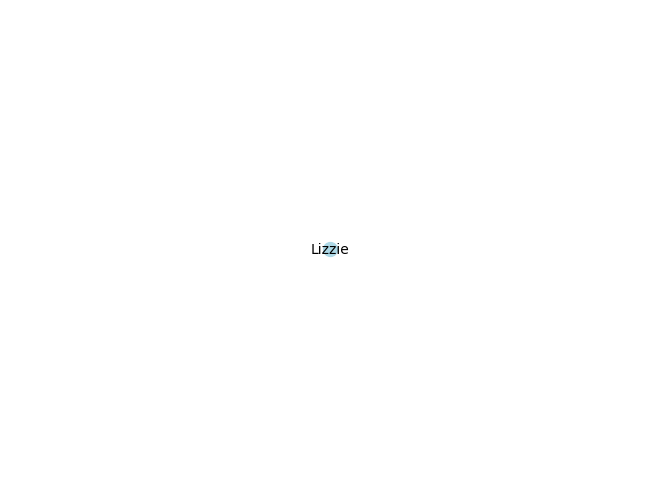

In [ ]:
def connect_parts(doc):
    connections = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            for token in ent:
                connections[token.text].append(ent)
    return connections

def build_graph(connections):
    G = nx.Graph()
    # Add nodes and edges based on connections in the dictionary
    for token, entities in connections.items():
        G.add_node(token)
        for entity in entities:
            # Ensure every entity text that includes this token links back to the token
            if entity.text != token:  # Avoid self-loops
                G.add_edge(token, entity.text)
    print(G)
    return G

def query_graph(G, node, depth=1):
    if node not in G:
        print(f"Node '{node}' not found in the graph.")
        return None

    # Use BFS to get all connections up to 'depth' levels deep
    subgraph_nodes = set()
    for d in range(depth + 1):  # Include the depth level itself
        for neighbor in nx.single_source_shortest_path_length(G, node, cutoff=d):
            subgraph_nodes.add(neighbor)

    # Create a subgraph with the nodes found
    subgraph = G.subgraph(subgraph_nodes)
    visualize_graph(subgraph)

def visualize_graph(G):
    pos = nx.spring_layout(G)  # Generate positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=100, edge_color='gray', linewidths=1, font_size=10)
    plt.show()


def connect_nicknames(doc, links):
    connections = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            main_connected = False
            for token in ent:
                for main_name, variants in links.items():
                    # Connect every token that matches a main name or its variants directly to the main name
                    if token.text == main_name or token.text in variants:
                        if not main_connected:  # Only add the main name once per entity
                            connections[main_name].append(ent.text)
                            main_connected = True
                        # Link each variant to the main name
                        connections[token.text].append(main_name)
    return connections

connections = connect_parts(doc)
new_links = connect_nicknames(doc, links)
G = build_graph(connections)
query_graph(G, "Elizabeth")
